<a href="https://colab.research.google.com/github/Ojz31/Inventory_management/blob/main/Inventory_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [26]:
df = pd.read_csv('/content/retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.shape

(1000, 9)

In [5]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [6]:
df.duplicated().sum()

0

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df['Date_day'] = df['Date'].dt.day
df.drop(columns= 'Date',axis = 1,inplace = True)
df.head()

,Transaction ID,Customer ID,Gender,Product Category,Quantity,Price per Unit,Total Amount,age_group,Day,Month,Year,Date_day
0,1,CUST001,Male,Beauty,3,50,150,30-39,Friday,November,2023,24
1,2,CUST002,Female,Clothing,2,500,1000,18-29,Monday,February,2023,27
2,3,CUST003,Male,Electronics,1,30,30,40-49,Friday,January,2023,13
3,4,CUST004,Male,Clothing,1,500,500,30-39,Sunday,May,2023,21
4,5,CUST005,Male,Beauty,2,50,100,18-29,Saturday,May,2023,6


In [33]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['Month'] = pd.Categorical(df['Month'],categories=month_order,ordered=True)

In [29]:
bins=[18,30,40,50,60,70]
label = ['18-29','30-39','40-49','50-59','60+']
df['age_group'] = pd.cut(df['Age'],labels=label,bins=bins)
df.drop(columns= 'Age',axis = 1,inplace = True)
df.head()

,Transaction ID,Date,Customer ID,Gender,Product Category,Quantity,Price per Unit,Total Amount,age_group
0,1,2023-11-24,CUST001,Male,Beauty,3,50,150,30-39
1,2,2023-02-27,CUST002,Female,Clothing,2,500,1000,18-29
2,3,2023-01-13,CUST003,Male,Electronics,1,30,30,40-49
3,4,2023-05-21,CUST004,Male,Clothing,1,500,500,30-39
4,5,2023-05-06,CUST005,Male,Beauty,2,50,100,18-29


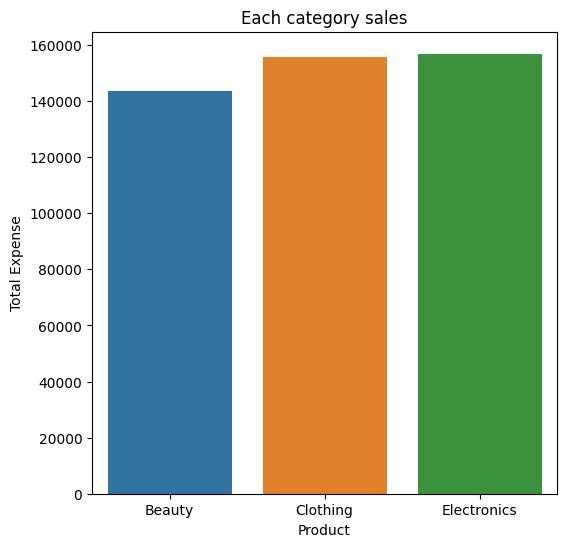

In [11]:
group_prod_amo = df.groupby(['Product Category'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(6,6))
sns.barplot(data= group_prod_amo, x='Product Category', y ='Total Amount', hue='Product Category')
plt.title("Each category sales")
plt.xlabel('Product')
plt.ylabel('Total Expense')
plt.show()

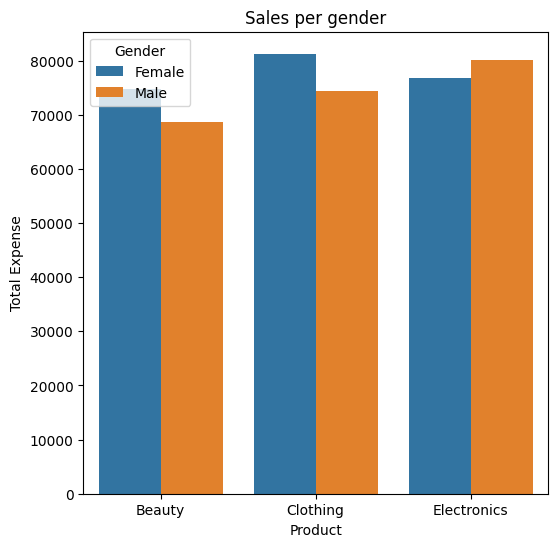

In [12]:
group_gend_amo = df.groupby(['Product Category' , 'Gender'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(6,6))
sns.barplot(data= group_gend_amo, x='Product Category', y ='Total Amount', hue='Gender')
plt.title("Sales per gender")
plt.xlabel('Product')
plt.ylabel('Total Expense')
plt.show()

<ipython-input-13-fa4120ca095e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month_sales = df.groupby(['Month','Product Category'])['Total Amount'].sum().reset_index()


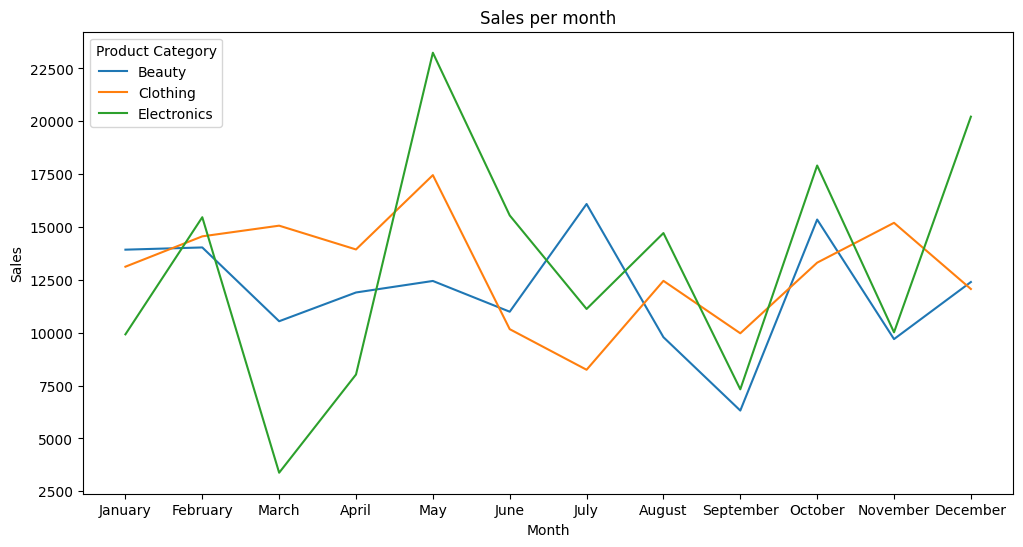

In [13]:
group_month_sales = df.groupby(['Month','Product Category'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data = group_month_sales, x = 'Month', y = 'Total Amount',hue = 'Product Category')
plt.title("Sales per month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

<ipython-input-14-532789e53818>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_age_sales = df.groupby(['age_group','Gender'])['Total Amount'].sum().reset_index()


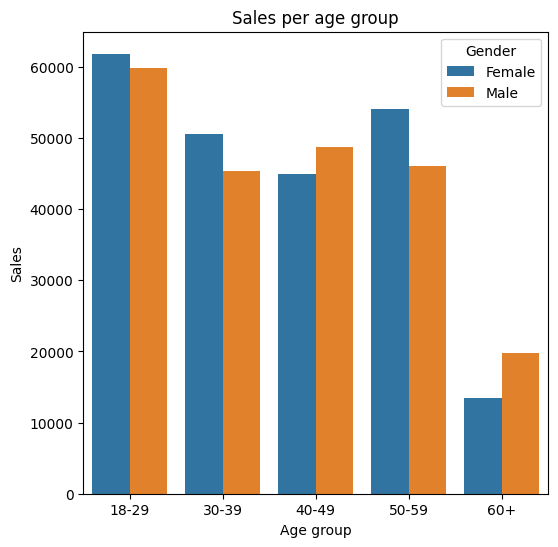

In [14]:
group_age_sales = df.groupby(['age_group','Gender'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(6,6))
sns.barplot(data = group_age_sales, x = 'age_group', y = 'Total Amount',hue='Gender')
plt.title("Sales per age group")
plt.xlabel("Age group")
plt.ylabel("Sales")
plt.show()

<ipython-input-15-3f29bb2e8b72>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_age_sales = df.groupby(['age_group','Product Category'])['Total Amount'].sum().reset_index()


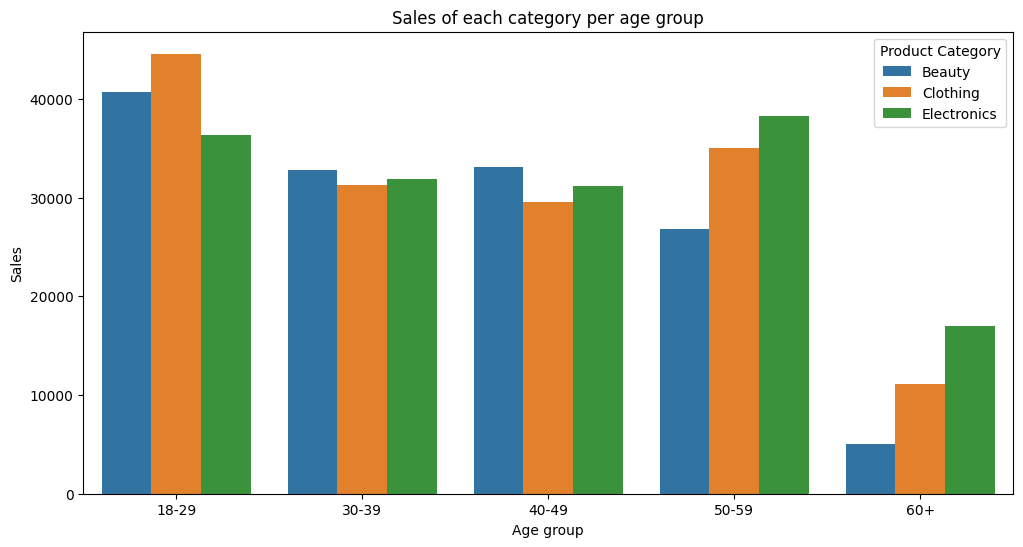

In [15]:
group_age_sales = df.groupby(['age_group','Product Category'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data = group_age_sales, x = 'age_group', y = 'Total Amount',hue='Product Category')
plt.title("Sales of each category per age group")
plt.xlabel("Age group")
plt.ylabel("Sales")
plt.show()

<ipython-input-16-e0e067f06e95>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group7=df.groupby(['age_group', 'Product Category', 'Gender'])['Total Amount'].sum().reset_index()


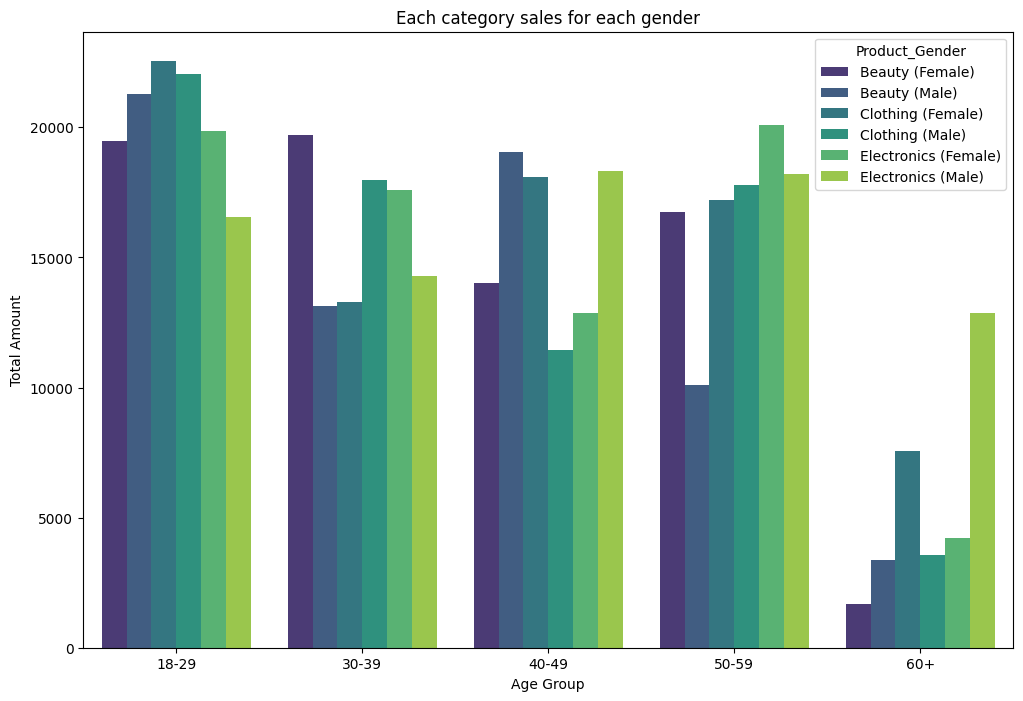

In [16]:
group7=df.groupby(['age_group', 'Product Category', 'Gender'])['Total Amount'].sum().reset_index()
group7['Product_Gender'] = group7['Product Category'] + ' (' + group7['Gender'] + ')'
plt.figure(figsize=(12, 8))
sns.barplot(data=group7, x='age_group', y='Total Amount', hue='Product_Gender',palette='viridis')
plt.title("Each category sales for each gender")
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

In [41]:
df_encoded.drop(columns=['Customer ID', 'Transaction ID', 'Day','Month','Year','Date_day' ],axis =1,inplace=True)

In [42]:
df_encoded.head()

,Quantity,Price per Unit,Total Amount,Gender_Male,Product Category_Clothing,Product Category_Electronics,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+
0,3,50,150,True,False,False,True,False,False,False
1,2,500,1000,False,True,False,False,False,False,False
2,1,30,30,True,False,True,False,True,False,False
3,1,500,500,True,True,False,True,False,False,False
4,2,50,100,True,False,False,False,False,False,False


In [44]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Product Category', 'age_group'], drop_first=True)
X = df_encoded.drop(columns=['Total Amount'])
y = df_encoded['Total Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 42563.1692751153
R^2 Score: 0.8545988200267345
